# The use of GenAI in the Games Industry
Analyzing and visualizing our survey data


## Setup
First we import needed libraries and our data from a .xlsx file.


In [31]:
# package for data manipulation including ggplot2
library(tidyverse)

# package for reading excel files
library(readxl)

# read the excel file
data <- read_excel("surveyData20240406.xlsx")


## What is the data?
Now let's count the rows (number of respondents) and list the collumns (questions).

In [32]:
# count the number of rows and columns
dim(data)

# list the column names
names(data)


[1] 250  56

[1] "ID"                                                                                                       
 [2] "Start time"                                                                                               
 [3] "Completion time"                                                                                          
 [4] "Do you consider yourself a professional or a hobbyist in game development?"                               
 [5] "Primary area of work?"                                                                                    
 [6] "Years of experience in game development?"                                                                 
 [7] "Are you in a lead role?"                                                                                  
 [8] "Team size?"                                                                                               
 [9] "Column1"                                                                                                  
[10] "Statement 2"                                                                                              
[11] "Question3"                                                                                                
[12] "Overall stance on Generative AI?"                                                                         
[13] "Column2"                                                                                                  
[14] "Statement 22"                                                                                             
[15] "Which areas do you think are less<U+00A0>"                                                                
[16] "Art & Assets"                                                                                             
[17] "Level Design"                                                                                             
[18] "Storytelling"                                                                                             
[19] "Sound Design"                                                                                             
[20] "Voice Overs & Acting"                                                                                     
[21] "Programming"                                                                                              
[22] "Game Design"                                                                                              
[23] "Marketing & PR"                                                                                           
[24] "Music"                                                                                                    
[25] "Community management"                                                                                     
[26] "Initial prototyping"                                                                                      
[27] "Do you use Generative AI in your work?"                                                                   
[28] "Was it your own idea to begin using Generative AI or your employers?"                                     
[29] "Efficiency?"                                                                                              
[30] "Quality?"                                                                                                 
[31] "Enjoyment?"                                                                                               
[32] "Do you think of the ability to use Generative AI as an actual and useful competence in your area of work?"
[33] "Do your coworkers use Generative AI in their work?"                                                       
[34] "Do your peers in the industry use Generative AI in their work?"                                           
[35] "Do you disclose your use of Generative AI internally?"                                                    
[36] "Do you disclose your use of Generative A

## Proffesionals vs Hobbyists
Now let's compare the proffesionals and the hobbyists.

### Distribution

Do you consider yourself a professional or a hobbyist in game development?,n,percentage
<chr>,<int>,<dbl>
Hobbyist,158,63.2
Professional,92,36.8


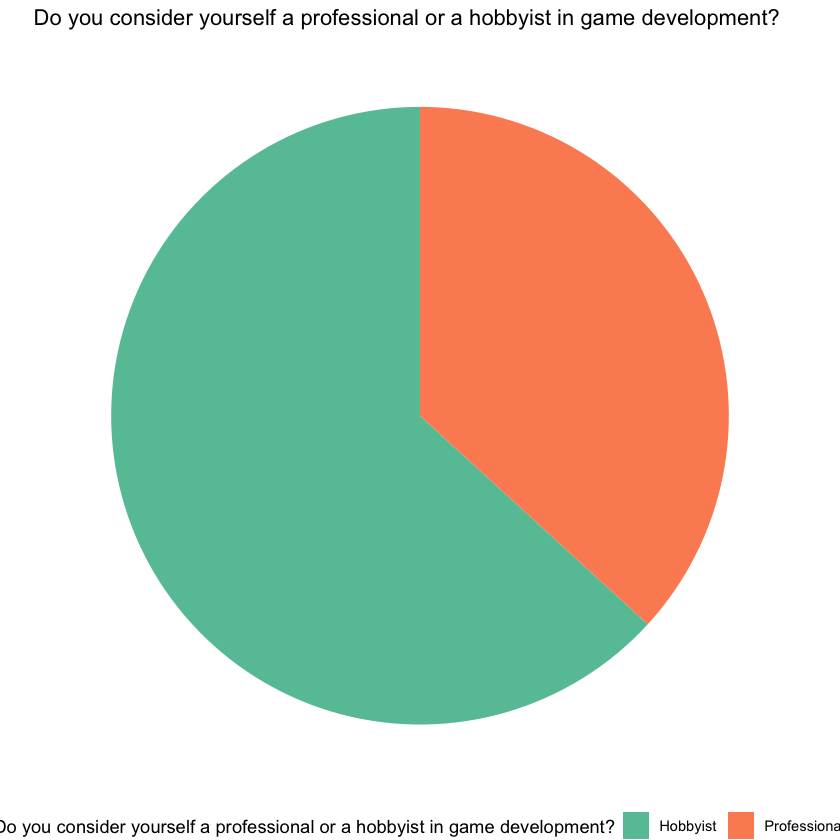

In [33]:
# Show the percentage of Do you consider yourself a professional or a hobbyist in game development?
data %>%
  count(`Do you consider yourself a professional or a hobbyist in game development?`) %>%
  mutate(percentage = n / sum(n) * 100)

# Make a pie chart of the data
data %>%
  count(`Do you consider yourself a professional or a hobbyist in game development?`) %>%
  ggplot(aes(
    x = "", y = n, fill =
      `Do you consider yourself a professional or a hobbyist in game development?`
  )) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  theme(legend.position = "bottom") +
  labs(title = "Do you consider yourself a professional or a hobbyist in game development?") +
  scale_fill_brewer(palette = "Set2")


### Do they use GenAi?

Do you use Generative AI in your work?,n,percentage
<chr>,<int>,<dbl>
No,154,61.6
Yes,96,38.4


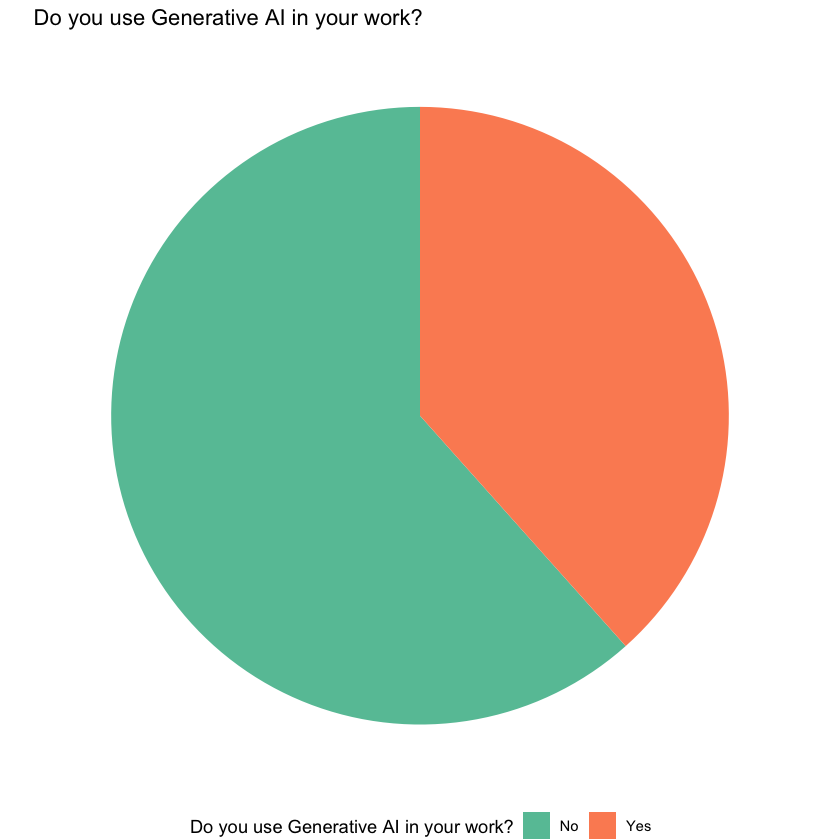

In [34]:
# Show the percentage of Do you use Generative AI in ypur work?
data %>%
  count(`Do you use Generative AI in your work?`) %>%
  mutate(percentage = n / sum(n) * 100)

# Make a pie chart of the data
data %>%
  count(`Do you use Generative AI in your work?`) %>%
  ggplot(aes(x = "", y = n, fill = `Do you use Generative AI in your work?`)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  theme(legend.position = "bottom") +
  labs(title = "Do you use Generative AI in your work?") +
  scale_fill_brewer(palette = "Set2")


Do you consider yourself a professional or a hobbyist in game development?,Do you use Generative AI in your work?,n,percentage
<chr>,<chr>,<int>,<dbl>
Hobbyist,No,102,64.55696
Hobbyist,Yes,56,35.44304
Professional,No,52,56.52174
Professional,Yes,40,43.47826


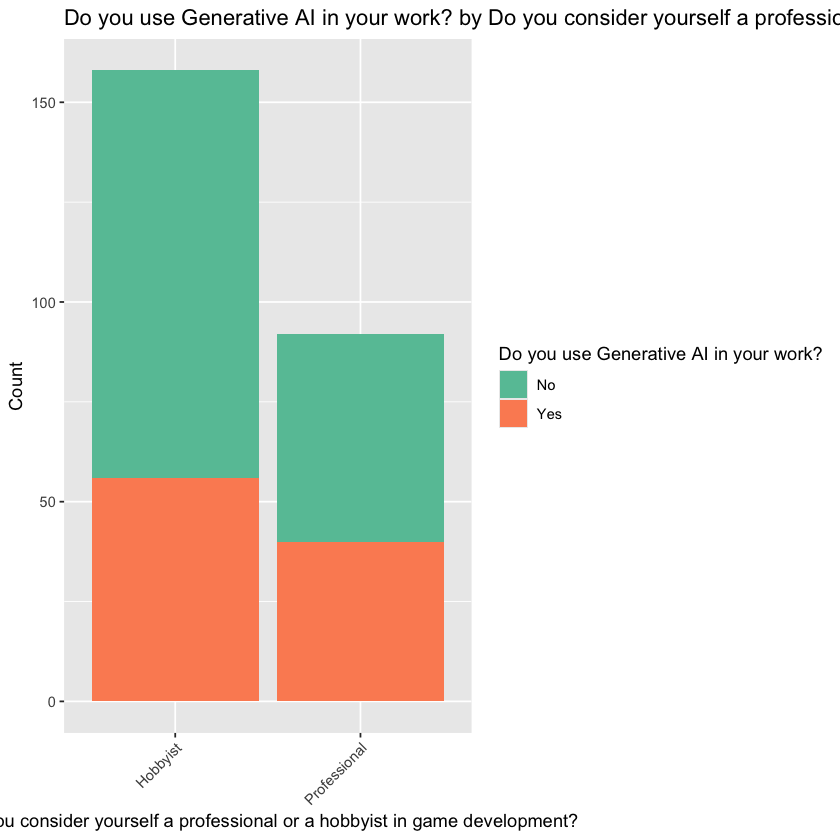

In [91]:
# Make a stacked bar chart of Do you use Generative AI in your work? by
# Do you consider yourself a professional or a hobbyist in game development?
data %>%
  count(
    `Do you consider yourself a professional or a hobbyist in game development?`,
    `Do you use Generative AI in your work?`
  ) %>%
  ggplot(aes(
    x = `Do you consider yourself a professional or a hobbyist in game development?`,
    y = n,
    fill = `Do you use Generative AI in your work?`
  )) +
  geom_bar(stat = "identity") +
  labs(
    title = "Do you use Generative AI in your work? by Do you consider yourself a professional or a hobbyist in game development?",
    x = "Do you consider yourself a professional or a hobbyist in game development?",
    y = "Count"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set2")

# Show the percentage of Do you use Generative AI in your work? by
# Do you consider yourself a professional or a hobbyist in game development?
data %>%
  count(
    `Do you consider yourself a professional or a hobbyist in game development?`,
    `Do you use Generative AI in your work?`
  ) %>%
  group_by(`Do you consider yourself a professional or a hobbyist in game development?`) %>%
  mutate(percentage = n / sum(n) * 100)


### Overall stance on GenAI

Column2,n,percentage
<fct>,<int>,<dbl>
Very negative,72,28.8
Negative,47,18.8
Neutral,51,20.4
Positive,51,20.4
Very positive,29,11.6


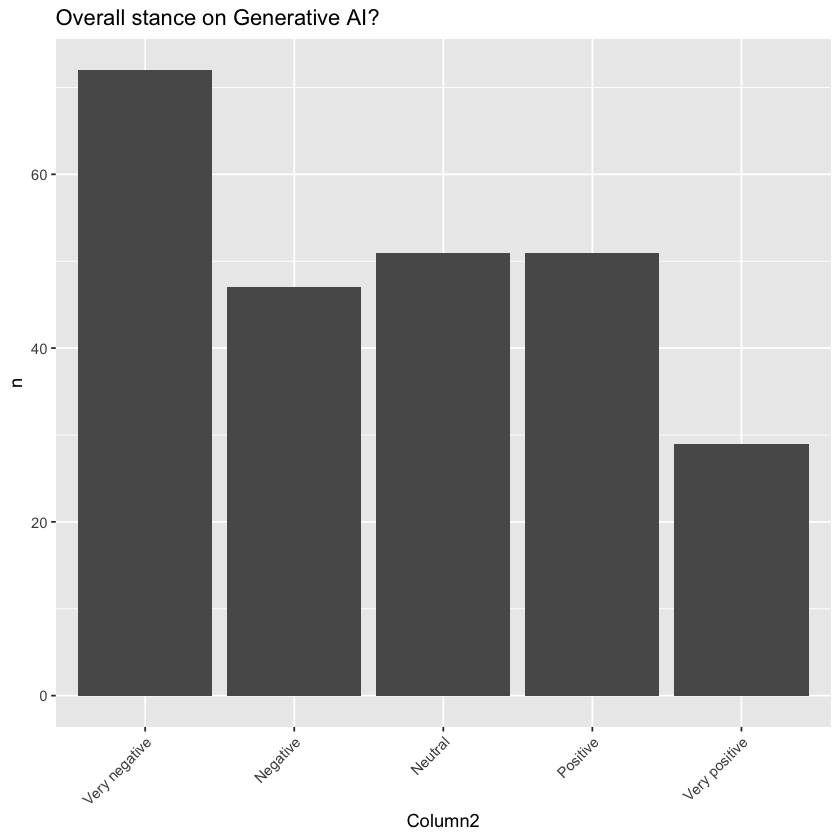

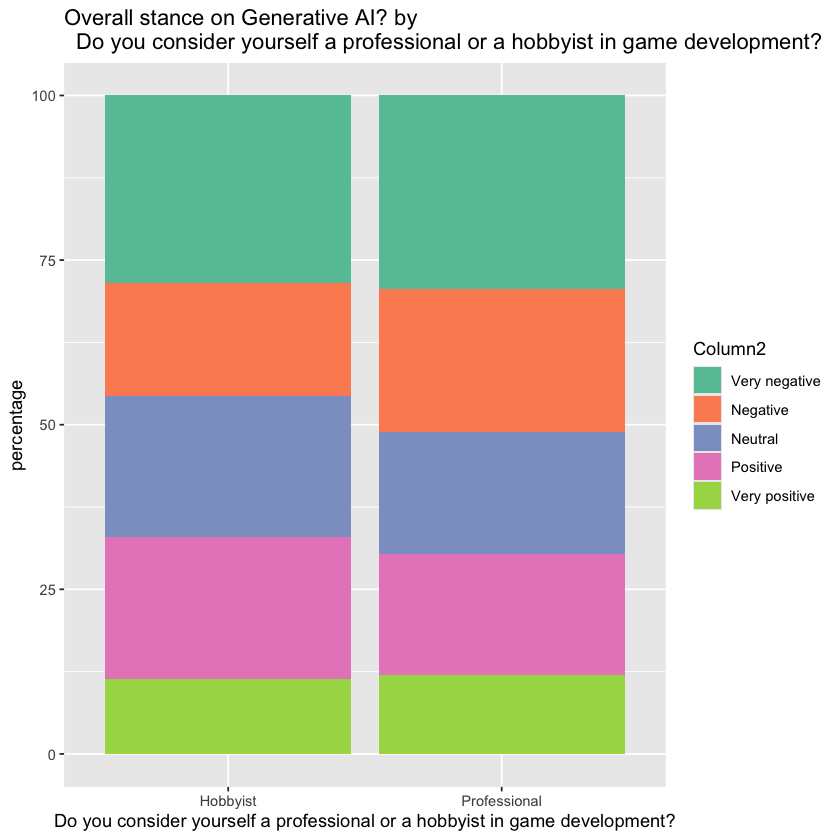

In [84]:
# Show the data from the likert scale question Overall stance on Generative AI?
# And order it from left to right "Very negative", "Negative", "Neutral", "Positive", "Very positive"
data %>%
  count(`Column2`) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  mutate(`Column2` = factor(
    `Column2`,
    levels = c("Very negative", "Negative", "Neutral", "Positive", "Very positive")
  )) %>%
  arrange(`Column2`)

# Make a chart of the data
data %>%
  count(`Column2`) %>%
  mutate(`Column2` = factor(
    `Column2`,
    levels = c("Very negative", "Negative", "Neutral", "Positive", "Very positive")
  )) %>%
  ggplot(aes(x = `Column2`, y = n)) +
  geom_bar(stat = "identity") +
  labs(title = "Overall stance on Generative AI?") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_discrete(
    breaks = c("Very negative", "Negative", "Neutral", "Positive", "Very positive"),
    labels = c("Very negative", "Negative", "Neutral", "Positive", "Very positive")
  )

# Take the above data and make a stacked bar chart by
# Do you consider yourself a professional or a hobbyist in game development?
# And show the y-axis as a percentage and order it from "Very negative", "Negative", "Neutral", "Positive", "Very positive"
data %>%
  count(
    `Do you consider yourself a professional or a hobbyist in game development?`,
    `Column2`
  ) %>%
  group_by(`Do you consider yourself a professional or a hobbyist in game development?`) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  mutate(`Column2` = factor(
    `Column2`,
    levels = c("Very negative", "Negative", "Neutral", "Positive", "Very positive")
  )) %>%
  ggplot(aes(
    x = `Do you consider yourself a professional or a hobbyist in game development?`,
    y = percentage, fill = `Column2`
  )) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Overall stance on Generative AI? by
  Do you consider yourself a professional or a hobbyist in game development?") +
  scale_fill_brewer(palette = "Set2")